## Load and Explore the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load the datasets
customer_agg = pd.read_csv('/content/drive/MyDrive/Practicum/datasets after process/customer_agg.csv')
merged_df = pd.read_csv('/content/drive/MyDrive/Practicum/datasets after process/merged_df.csv')
sales_trends = pd.read_csv('/content/drive/MyDrive/Practicum/datasets after process/Sales_Trends.csv')

# Display the first few rows of each dataset
print(customer_agg.head())
print(merged_df.head())
print(sales_trends.head())

   customer_id  purchase_frequency  total_amount  recency  customer_lifetime  \
0  C0100000111                   6        882.97       80                281   
1  C0100000199                   3        597.00       73                191   
2  C0100000343                   6        700.94       24                308   
3  C0100000375                   4        223.98       65                289   
4  C0100000392                  32        626.12       25                327   

      clv  
0  882.97  
1  597.00  
2  700.94  
3  223.98  
4  626.12  
   customer_id  PostalCode  Gender       YOB  MaritalStatus  HasChildren  \
0  C0101482495           0       1  1.701975              2            0   
1  C0100634627           1       0  1.020606              1            1   
2  C0100594701           1       0  1.020606              0            1   
3  C0105231010           3       0  0.825929              0            1   
4  C0101923201           3       0 -1.704871              0        

## Initial Data Exploration and Cleaning

In [ ]:
# Basic information and statistics
print(customer_agg.info())
print(customer_agg.describe())

print(merged_df.info())
print(merged_df.describe())

print(sales_trends.info())
print(sales_trends.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60535 entries, 0 to 60534
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         60535 non-null  object 
 1   purchase_frequency  60535 non-null  int64  
 2   total_amount        60535 non-null  float64
 3   recency             60535 non-null  int64  
 4   customer_lifetime   60535 non-null  int64  
 5   clv                 60535 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.8+ MB
None
       purchase_frequency  total_amount       recency  customer_lifetime  \
count        60535.000000  60535.000000  60535.000000       60535.000000   
mean             6.516974    427.155577     95.218551         180.072652   
std              9.789330    344.456584     85.819746         116.860501   
min              1.000000      1.490000      0.000000           0.000000   
25%              2.000000    200.980000     25.000000

## Train

In [ ]:
import pandas as pd

# Merge the datasets on 'customer_id'
df_merged = customer_agg.merge(merged_df, on='customer_id', how='left')

# Display the first few rows of the merged dataset
print(df_merged.head())

   customer_id  purchase_frequency  total_amount  recency  customer_lifetime  \
0  C0100000111                   6        882.97       80                281   
1  C0100000199                   3        597.00       73                191   
2  C0100000343                   6        700.94       24                308   
3  C0100000375                   4        223.98       65                289   
4  C0100000392                  32        626.12       25                327   

      clv  PostalCode  Gender       YOB  MaritalStatus  ...   Pop0_25  \
0  882.97         NaN     NaN       NaN            NaN  ...       NaN   
1  597.00         NaN     NaN       NaN            NaN  ...       NaN   
2  700.94      2405.0     0.0 -1.607532            2.0  ...  0.435229   
3  223.98      2482.0     1.0 -0.780156            1.0  ... -1.503376   
4  626.12      5377.0     0.0  0.679921            1.0  ...  0.919880   

   Pop26_45  Pop46_55  Pop56_65  PopOver65  HHIncomeMed  WhtCollarOcc  \
0      

In [ ]:
# Select the target and features
target = 'purchase_frequency'
features = ['customer_lifetime', 'recency', 'customer_id']  # Adjust as needed based on actual column names

X = df_merged[features]
y = df_merged[target]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['customer_lifetime', 'recency']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['customer_id'])
    ]
)

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 42.5633
R^2 Score: 0.5461


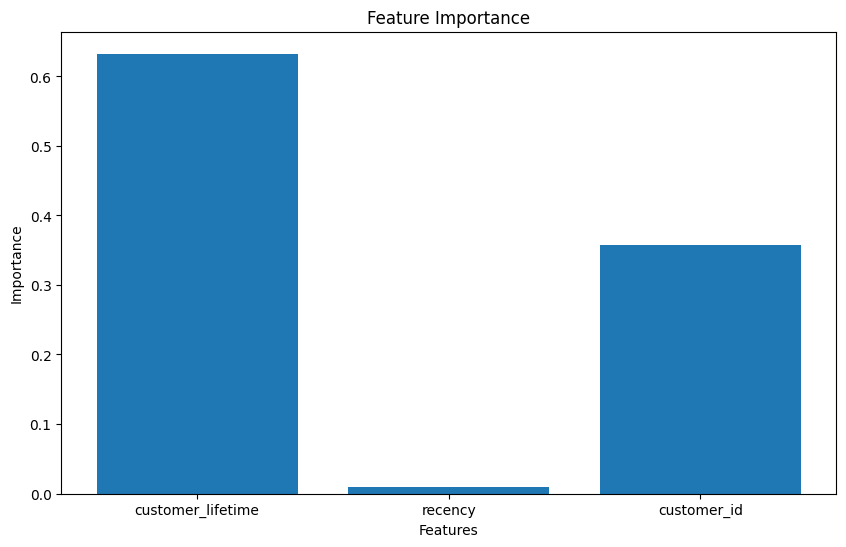

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = rf_model.predict(X_test_preprocessed)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Display feature importances
import numpy as np
import matplotlib.pyplot as plt

# Retrieve the feature importances
feature_importances = rf_model.feature_importances_

# Since customer_id is one-hot encoded, we need to sum the importances of its categories
onehot_encoder = preprocessor.named_transformers_['cat']
categories = onehot_encoder.categories_[0]
customer_id_importance = feature_importances[-len(categories):].sum()

# Create a dictionary with feature names and their importance
features = ['customer_lifetime', 'recency', 'customer_id']
importances = list(feature_importances[:-len(categories)]) + [customer_id_importance]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(features, importances, align="center")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
# Define the bins and labels
bins = [-1, 10, 20, float('inf')]
labels = ['low', 'medium', 'high']

# Bin the true values
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

# Bin the predicted values
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_binned, y_pred_binned)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test_binned, y_pred_binned, zero_division=0)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9121

Confusion Matrix:
[[  756   308   126]
 [  174 10248    83]
 [   93   280    39]]

Classification Report:
              precision    recall  f1-score   support

        high       0.74      0.64      0.68      1190
         low       0.95      0.98      0.96     10505
      medium       0.16      0.09      0.12       412

    accuracy                           0.91     12107
   macro avg       0.61      0.57      0.59     12107
weighted avg       0.90      0.91      0.90     12107



For now, the model performs well for the low category but struggles with the high and medium categories. This could be due to an imbalance in the dataset, where the low category is significantly larger. While the overall accuracy is high, the poor performance on medium and high categories suggests the model needs improvement in handling these classes.

In [ ]:
# Check the distribution of the target variable in the training set
print(y_train.value_counts())

purchase_frequency
3     11111
2     10662
4      8275
1      6159
5      3451
      ...  
82        1
69        1
67        1
84        1
72        1
Name: count, Length: 74, dtype: int64


In [ ]:
# Filter out rare classes with less than a minimum number of samples, e.g., 5
min_samples = 5
y_train_filtered = y_train[y_train.map(y_train.value_counts()) >= min_samples]
X_train_filtered = X_train_preprocessed[y_train.map(y_train.value_counts()) >= min_samples]

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Adjust the k_neighbors parameter based on the filtered smallest class size
smote = SMOTE(random_state=42, k_neighbors=2)

# Apply SMOTE to the filtered training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Train the Random Forest classifier on the balanced data
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = rf_classifier_smote.predict(X_test_preprocessed)

# Bin the predictions and true values
y_pred_binned_smote = pd.cut(y_pred_smote, bins=bins, labels=labels)
y_test_binned_smote = pd.cut(y_test, bins=bins, labels=labels)

# Evaluate the model's performance
accuracy_smote = accuracy_score(y_test_binned_smote, y_pred_binned_smote)
print(f"Accuracy: {accuracy_smote:.4f}")

conf_matrix_smote = confusion_matrix(y_test_binned_smote, y_pred_binned_smote)
print("\nConfusion Matrix:")
print(conf_matrix_smote)

class_report_smote = classification_report(y_test_binned_smote, y_pred_binned_smote, zero_division=0)
print("\nClassification Report:")
print(class_report_smote)

Accuracy: 0.8841

Confusion Matrix:
[[  221   968     1]
 [   23 10482     0]
 [   27   384     1]]

Classification Report:
              precision    recall  f1-score   support

        high       0.82      0.19      0.30      1190
         low       0.89      1.00      0.94     10505
      medium       0.50      0.00      0.00       412

    accuracy                           0.88     12107
   macro avg       0.73      0.40      0.42     12107
weighted avg       0.87      0.88      0.84     12107



The model still shows high overall accuracy but struggles significantly with the "high" and "medium" categories, as indicated by low precision, recall, and F1 scores for these classes. This imbalance in performance suggests that the model is heavily biased towards the majority class ("low").

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply SMOTEENN to the filtered training data
smoteenn = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=2))
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train_filtered, y_train_filtered)

# Train the Random Forest classifier on the balanced data
rf_classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = rf_classifier_resampled.predict(X_test_preprocessed)

# Bin the predictions and true values
y_pred_binned_resampled = pd.cut(y_pred_resampled, bins=bins, labels=labels)
y_test_binned_resampled = pd.cut(y_test, bins=bins, labels=labels)

# Evaluate the model's performance
accuracy_resampled = accuracy_score(y_test_binned_resampled, y_pred_binned_resampled)
print(f"Accuracy: {accuracy_resampled:.4f}")

conf_matrix_resampled = confusion_matrix(y_test_binned_resampled, y_pred_binned_resampled)
print("\nConfusion Matrix:")
print(conf_matrix_resampled)

class_report_resampled = classification_report(y_test_binned_resampled, y_pred_binned_resampled, zero_division=0)
print("\nClassification Report:")
print(class_report_resampled)

Accuracy: 0.9019

Confusion Matrix:
[[  574   544    72]
 [  142 10335    28]
 [   81   321    10]]

Classification Report:
              precision    recall  f1-score   support

        high       0.72      0.48      0.58      1190
         low       0.92      0.98      0.95     10505
      medium       0.09      0.02      0.04       412

    accuracy                           0.90     12107
   macro avg       0.58      0.50      0.52     12107
weighted avg       0.87      0.90      0.88     12107



In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for saving and loading
model_path = '/content/drive/My Drive/rf_classifier_resampled.pkl'
X_train_preprocessed_path = '/content/drive/My Drive/X_train_preprocessed.pkl'
y_train_path = '/content/drive/My Drive/y_train.pkl'
X_test_preprocessed_path = '/content/drive/My Drive/X_test_preprocessed.pkl'
y_test_path = '/content/drive/My Drive/y_test.pkl'
X_train_resampled_path = '/content/drive/My Drive/X_train_resampled.pkl'
y_train_resampled_path = '/content/drive/My Drive/y_train_resampled.pkl'

# Save the model and preprocessed data
joblib.dump(rf_classifier_resampled, model_path)
joblib.dump(X_train_preprocessed, X_train_preprocessed_path)
joblib.dump(y_train, y_train_path)
joblib.dump(X_test_preprocessed, X_test_preprocessed_path)
joblib.dump(y_test, y_test_path)
joblib.dump(X_train_resampled, X_train_resampled_path)
joblib.dump(y_train_resampled, y_train_resampled_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/y_train_resampled.pkl']

In [ ]:
import os
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for saving and loading
model_path = '/content/drive/My Drive/rf_classifier_resampled.pkl'
X_train_preprocessed_path = '/content/drive/My Drive/X_train_preprocessed.pkl'
y_train_path = '/content/drive/My Drive/y_train.pkl'
X_test_preprocessed_path = '/content/drive/My Drive/X_test_preprocessed.pkl'
y_test_path = '/content/drive/My Drive/y_test.pkl'
X_train_resampled_path = '/content/drive/My Drive/X_train_resampled.pkl'
y_train_resampled_path = '/content/drive/My Drive/y_train_resampled.pkl'

# Check if the files exist and load them
if os.path.exists(model_path):
    rf_classifier_resampled = joblib.load(model_path)
    X_train_preprocessed = joblib.load(X_train_preprocessed_path)
    y_train = joblib.load(y_train_path)
    X_test_preprocessed = joblib.load(X_test_preprocessed_path)
    y_test = joblib.load(y_test_path)
    X_train_resampled = joblib.load(X_train_resampled_path)
    y_train_resampled = joblib.load(y_train_resampled_path)
else:
    print("Saved files not found. Please run the preprocessing and model training steps.")

# Predict on the test set
y_pred_resampled = rf_classifier_resampled.predict(X_test_preprocessed)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

bins = [-1, 10, 20, float('inf')]
labels = ['low', 'medium', 'high']
y_pred_binned_resampled = pd.cut(y_pred_resampled, bins=bins, labels=labels)
y_test_binned_resampled = pd.cut(y_test, bins=bins, labels=labels)

accuracy_resampled = accuracy_score(y_test_binned_resampled, y_pred_binned_resampled)
print(f"Accuracy: {accuracy_resampled:.4f}")

conf_matrix_resampled = confusion_matrix(y_test_binned_resampled, y_pred_binned_resampled)
print("\nConfusion Matrix:")
print(conf_matrix_resampled)

class_report_resampled = classification_report(y_test_binned_resampled, y_pred_binned_resampled, zero_division=0)
print("\nClassification Report:")
print(class_report_resampled)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.9019

Confusion Matrix:
[[  574   544    72]
 [  142 10335    28]
 [   81   321    10]]

Classification Report:
              precision    recall  f1-score   support

        high       0.72      0.48      0.58      1190
         low       0.92      0.98      0.95     10505
      medium       0.09      0.02      0.04       412

    accuracy                           0.90     12107
   macro avg       0.58      0.50      0.52     12107
weighted avg       0.87      0.90      0.88     12107



## Conclusion

### Model Performance Summary
The Random Forest model trained on the customer aggregation data achieved an overall accuracy of 90.19% on the validation set.
Below is a detailed analysis of the model's performance:

### Analysis

- **High and Low Classes**:
  - The model performs well in predicting the 'low' class with a precision of 0.92 and a recall of 0.98, resulting in a high f1-score of 0.95.
  - The 'high' class has moderate performance with a precision of 0.72 and a recall of 0.48, indicating that while it is relatively good at predicting 'high' instances, it misses number of them.

- **Medium Class**:
  - The 'medium' class prediction is notably poor with a precision of 0.09 and a recall of 0.02. This indicates that the model struggles to accurately predict this class, resulting in a very low f1-score of 0.04.